In [ ]:
!pip install resnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import os
import requests
import cv2
import numpy as np
from keras.utils import np_utils
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint, EarlyStopping,CSVLogger
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import datetime

In [ ]:
import PIL
PIL.__version__  # should be 5.2.0

'7.1.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/links.json"

with open(path) as file:
  data = json.load(file)

In [ ]:
#CODE BLOCK THAT DOWNLOAD IMAGES TO DRIVE FROM .JSON FILE

'''try:
  for i in range(len(data)):
    img_url=data[i]
    r=requests.get(img_url,stream=True)
    img_name=data[i].get("imgname")
    if os.path.exists(img_name ) or os.path.isdir(img_name) : continue
    with open("/content/drive/My Drive/images/"+img_name, "wb") as file:
      for block in r.iter_content(chunk_size = None):
        if block:
          file.write(block)
        
except(IsADirectoryError):
  print('(IsADirectoryError) hatası oluştu') 
  pass'''


'try:\n  for i in range(len(data)):\n    img_url=data[i]\n    r=requests.get(img_url,stream=True)\n    img_name=data[i].get("imgname")\n    if os.path.exists(img_name ) or os.path.isdir(img_name) : continue\n    with open("/content/drive/My Drive/images/"+img_name, "wb") as file:\n      for block in r.iter_content(chunk_size = None):\n        if block:\n          file.write(block)\n        \nexcept(IsADirectoryError):\n  print(\'(IsADirectoryError) hatası oluştu\') \n  pass'

In [ ]:
unique_labels=[]

unique_labels.append(data[0].get("objectname"))

for i in range(len(data)):
  if(data[i].get("objectname") in unique_labels):
    continue
  else:
    unique_labels.append(data[i].get("objectname"))

print(len(unique_labels))

for i in unique_labels:
  print(i)

def does_exist(str1 ,list):
  flag=0
  for i in range(len(list)):
    if str1==list[i]:
      flag=1
    else:
      continue
  if flag:
    return True
  else:
    return False

35
yatak-ortusu
minder
koltuk
masa
sandalye
hali
vazo
puf
dolap
fon
tulperde
stor
kumas
katalog
lamba
sehpa
avize
wallpaper
duvarkagidi
kaban
Elbise
Ustkiyafet
Pantolon
Ayakkabi
ayakkabi
Etek
Canta
Kemer
Gozluk
Sapka
etek
pantolon
elbise
Duvar Kagıdı
duvar kagıdı


In [ ]:
#Kıyafet olanların hepsini sil 
#labelları da bir listede tutup bu images dosyasını açıp okuma işlemi yaparken labelı pantolon olan bir resimse silme işlemi mi yapacağim
import cv2,os
label = []
imgarr=[]

base_dir = '/content/drive/MyDrive'
images_dir = os.path.join(base_dir,'images')
doublecats_dir = os.path.join(base_dir,'double_category')

selected_cats=["tulperde","fon","kumas","katalog",]
perde_cats=["tulperde","fon"]
kumas_cats=["kumas","katalog"]
mobilyacats=["yatak-ortusu","minder","koltuk","masa","sandalye","hali","vazo","puf","dolap","lamba","sehpa","avize"]
selected_cats.extend(mobilyacats)

doublecats_imgs = os.listdir(doublecats_dir)
doublecatsname = []
print(len(doublecats_imgs))
i=0
for img in doublecats_imgs:
  str=img.split("-",1)
  doublecatsname.append(str[1])

3051


In [ ]:
i=0
for item in data:
  try:
    imgpath_drive=os.path.join(images_dir,item['imgname'])
    if not item.get("objectname") in selected_cats:
        continue
    if  not(os.path.exists(imgpath_drive)):
        continue
    img=cv2.imread(imgpath_drive)
    img=cv2.resize(img,(224,224))
    #print(i,imgpath_drive)
    if item['imgname'] in doublecatsname:
      label.append("double")

    elif item['objectname'] in mobilyacats:
      label.append("mobilya")     

    elif item['objectname'] in perde_cats:
      label.append("perde")   

    elif item['objectname'] in kumas_cats:
      label.append("kumas")
      
    else:
      print('kategorisiz ürün',item.get("objectname"))
    imgarr.append(img)
    i=i+1
  except:
    continue


In [ ]:
print(len(label))
print(len(imgarr))

11322
11322


In [ ]:
random_dir = os.path.join(base_dir,'alakasız2')
random_imgs = os.listdir(random_dir)

for img in random_imgs:
  imgPath = os.path.join(random_dir,img)
  image = cv2.imread(imgPath)
  image = cv2.resize(image,(224,224))
  imgarr.append(image)
  label.append("alakasız")


In [ ]:
yeni_mobilya = os.path.join(base_dir,'yeni_mobilyalar')

yatak_dir = os.path.join(yeni_mobilya,'yatak')
sandalye_dir = os.path.join(yeni_mobilya,'sandalye')
masa_dir = os.path.join(yeni_mobilya,'masa')
koltuk_dir = os.path.join(yeni_mobilya,'koltuk')

yatak_imgs = os.listdir(yatak_dir)
sandalye_imgs = os.listdir(sandalye_dir)
masa_imgs = os.listdir(masa_dir)
koltuk_imgs = os.listdir(koltuk_dir)

for img in yatak_imgs:
  imgPath = os.path.join(yatak_dir,img)
  print(imgPath)
  image = cv2.imread(imgPath)
  image = cv2.resize(image,(224,224))
  imgarr.append(image)
  label.append("mobilya")

for img in sandalye_imgs:
  imgPath = os.path.join(sandalye_dir,img)
  image = cv2.imread(imgPath)
  print(imgPath)
  image = cv2.resize(image,(224,224))
  imgarr.append(image)
  label.append("mobilya")

for img in masa_imgs:
  imgPath = os.path.join(masa_dir,img)
  print(imgPath)
  image = cv2.imread(imgPath)
  image = cv2.resize(image,(224,224))
  imgarr.append(image)
  label.append("mobilya")

for img in koltuk_imgs:
  imgPath = os.path.join(koltuk_dir,img)
  print(imgPath)
  image = cv2.imread(imgPath)
  image = cv2.resize(image,(224,224))
  imgarr.append(image)
  label.append("mobilya")

In [ ]:
print(len(label))
print(len(imgarr))

13172
13172


In [ ]:
classes=[]
for i in range(len(label)):
  if(label[i] in classes):
    continue
  else:
    classes.append(label[i])

num_classes=len(classes)
print(num_classes)

for i in classes:
  print(i)

5
mobilya
perde
double
kumas
alakasız


In [ ]:
imgarr=np.array(imgarr).reshape(-1,224,224,3)
label=np.array(label).reshape(-1,1)
Y_label =[]

for i in label:
  if i == classes[0]:     #mobilya
    Y_label.append([1,0,0,0])
  elif i == classes[1]:   #perde
    Y_label.append([0,1,0,0])
  elif i == classes[2]:   #double
    Y_label.append([1,1,0,0])
  elif i == classes[3]:   #kumas
    Y_label.append([0,0,1,0])
  elif i == classes[4]:   #alakasız
    Y_label.append([0,0,0,1])


Y_label=np.array(Y_label).reshape(-1,4)
j=0
for i in label[0:200]:
  print(i,Y_label[j])
  j=j+1

#print(Y_label[125:200])
#print(imgarr[12000:12050])
print(Y_label.shape)
print(len(imgarr))

In [ ]:
print(Y_label.shape)
print(imgarr.shape)
#print(Y_label[11300:11500])

(13172, 4)
(13172, 224, 224, 3)


In [ ]:
num_classes=num_classes-1 #double'da eklenmişti ı-onu çıkardık
print(num_classes)

4


In [ ]:
#Training the model
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(
    include_top = False,
    input_shape=(224,224,3),
    pooling='max',classes=num_classes,#4 mobilya,perde,kumas,alakasız
    weights='imagenet'
)
for layer in pretrained_model.layers:
  layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(num_classes,activation='softmax'))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 8,196
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam()
resnet_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
print(imgarr.shape)

(13172, 224, 224, 3)


In [ ]:
%load_ext tensorboard

In [ ]:
logdir = os.path.join(base_dir,'logs')+'/'+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print(logdir)
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=15,verbose=1)
log_csv =CSVLogger('/content/drive/MyDrive/resnet50_3.csv',separator=',',append=True)
model_checkpoint = ModelCheckpoint("/content/drive/MyDrive/resnet50_model3.h5",save_best_only=True,monitor='val_acc',mode='max',verbose=1)

callbacks_list = [early_stop,log_csv,model_checkpoint,tensorboard_callback]

/content/drive/MyDrive/logs/20220707-071424


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'karsılastırma')

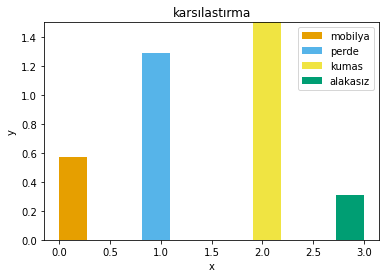

In [ ]:
x1 = []
x2 = []
x3 = []
x4 = []

for i in label:
  if i == classes[0]:     #mobilya
    x1.append(0)
  elif i == classes[1]:   #perde
    x2.append(1)
  elif i == classes[3]:   #kumas
    x3.append(2)
  elif i == classes[4]:   #alakasız
    x4.append(3)


# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73']
names = ['mobilya', 'perde', 'kumas','alakasız']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4], bins = int(11000/1000),density=True, stacked=True, color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('karsılastırma')

In [ ]:
%tensorboard --logdir logs

In [ ]:
resnet_model.fit(imgarr, Y_label, validation_split=0.1, epochs=35, batch_size=16, verbose=2,callbacks=callbacks_list )

Epoch 1/35
741/741 - 2049s - loss: 9.1843 - accuracy: 0.6100 - val_loss: 9.8269 - val_accuracy: 0.7891 - 2049s/epoch - 3s/step
Epoch 2/35
741/741 - 2095s - loss: 12.6613 - accuracy: 0.6388 - val_loss: 26.0808 - val_accuracy: 0.4833 - 2095s/epoch - 3s/step
Epoch 3/35
741/741 - 2095s - loss: 17.3379 - accuracy: 0.6406 - val_loss: 37.3144 - val_accuracy: 0.7489 - 2095s/epoch - 3s/step
Epoch 4/35
741/741 - 2044s - loss: 22.3140 - accuracy: 0.6446 - val_loss: 51.0880 - val_accuracy: 0.0501 - 2044s/epoch - 3s/step
Epoch 5/35
741/741 - 2028s - loss: 27.3742 - accuracy: 0.6430 - val_loss: 45.8428 - val_accuracy: 0.7686 - 2028s/epoch - 3s/step
Epoch 6/35
741/741 - 2092s - loss: 32.3871 - accuracy: 0.6457 - val_loss: 65.2355 - val_accuracy: 0.6070 - 2092s/epoch - 3s/step
Epoch 7/35
741/741 - 2097s - loss: 37.1449 - accuracy: 0.6486 - val_loss: 74.3220 - val_accuracy: 0.2762 - 2097s/epoch - 3s/step
Epoch 8/35
741/741 - 2043s - loss: 41.3119 - accuracy: 0.6473 - val_loss: 90.4802 - val_accuracy: 0

In [ ]:
resnet_model.save('/content/drive/MyDrive/models/resnet50_model3.h5')

In [ ]:
%tensorboard --logdir logs

In [ ]:
test = os.path.join(base_dir,'test')
test_imgs = os.listdir(test)

X_test = []
ylabel = []
Y_test = []

for img in test_imgs:
  imgPath = os.path.join(test,img)
  print(imgPath)
  image = cv2.imread(imgPath)
  image = cv2.resize(image,(224,224))
  X_test.append(image)
  str=img.split("-",1)
  ylabel.append(str[0])


In [ ]:
for i in ylabel:
  if i == classes[0]:     #mobilya
    Y_test.append([1,0,0,0])
  elif i == classes[1]:   #perde
    Y_test.append([0,1,0,0])
  elif i == classes[2]:   #double
    Y_test.append([1,1,0,0])
  elif i == classes[3]:   #kumas
    Y_test.append([0,0,1,0])
  elif i == classes[4]:   #alakasız
    Y_test.append([0,0,0,1])
  print(i)

X_test=np.array(X_test).reshape(-1,224,224,3)
Y_test=np.array(Y_test).reshape(-1,4)

In [ ]:
print(X_test.shape)
print(Y_test.shape)

(102, 224, 224, 3)
(102, 4)


In [ ]:
print("Evaluate on test data")
results = resnet_model.evaluate(X_test, Y_test, batch_size=32)
print("test loss, test acc:", results)


Evaluate on test data
4/4 [==============================] - 16s 4s/step - loss: 1.9011 - accuracy: 0.6471
test loss, test acc: [1.9011170864105225, 0.6470588445663452]


In [ ]:
cross_val_score(resnet_model, X = X_train, y = Y_train, cv = 10)

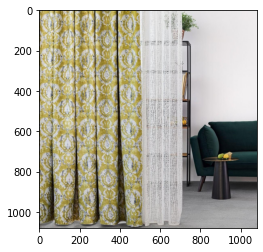

(1, 224, 224, 3)
[[0 1 0 0]]


In [ ]:
double_img_path='/content/drive/MyDrive/test/double-55.jpg'
img = image.load_img(double_img_path)
plt.imshow(img)
plt.show()

img =cv2.imread(double_img_path)
img = cv2.resize(img,(224,224))
img = np.array(img)

img = img.reshape(1,224,224,3)
print(img.shape)
'''
print(resnet_model.predict_classes(image))'''
y_pred = resnet_model.predict(img)
y_pred = np.round(y_pred).astype(int)
print(y_pred)
'''
#mobilya ([1,0,0,0])
#perde ([0,1,0,0])
#double ([1,1,0,0])
#kumas ([0,0,1,0])
#alakasız([0,0,0,1])
'''

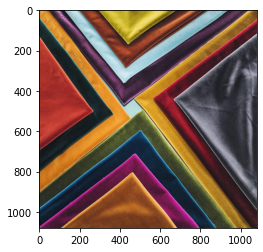

(1, 224, 224, 3)
[[0 0 1 0]]


'\n#mobilya ([1,0,0,0])\n#perde ([0,1,0,0])\n#double ([1,1,0,0])\n#kumas ([0,0,1,0])\n#alakasız([0,0,0,1])\n'

In [ ]:
kumas_img_path='/content/drive/MyDrive/test/kumas-9.jpg'
img = image.load_img(kumas_img_path)
plt.imshow(img)
plt.show()

img =cv2.imread(kumas_img_path)
img = cv2.resize(img,(224,224))
img = np.array(img)

img = img.reshape(1,224,224,3)
print(img.shape)
'''
print(resnet_model.predict_classes(image))'''
y_pred = resnet_model.predict(img)
y_pred = np.round(y_pred).astype(int)
print(y_pred)
'''
#mobilya ([1,0,0,0])
#perde ([0,1,0,0])
#double ([1,1,0,0])
#kumas ([0,0,1,0])
#alakasız([0,0,0,1])
'''

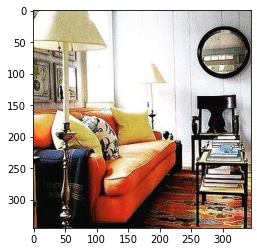

(1, 224, 224, 3)
[[1 0 0 0]]


'\n#mobilya ([1,0,0,0])\n#perde ([0,1,0,0])\n#double ([1,1,0,0])\n#kumas ([0,0,1,0])\n#alakasız([0,0,0,1])\n'

In [ ]:
kumas_img_path='/content/drive/MyDrive/test/double-35.jpg'
img = image.load_img(kumas_img_path)
plt.imshow(img)
plt.show()

img =cv2.imread(kumas_img_path)
img = cv2.resize(img,(224,224))
img = np.array(img)

img = img.reshape(1,224,224,3)
print(img.shape)
'''
print(resnet_model.predict_classes(image))'''
y_pred = resnet_model.predict(img)
y_pred = np.round(y_pred).astype(int)
print(y_pred)
'''
#mobilya ([1,0,0,0])
#perde ([0,1,0,0])
#double ([1,1,0,0])
#kumas ([0,0,1,0])
#alakasız([0,0,0,1])
'''

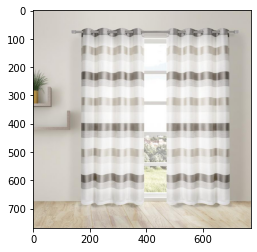

(1, 224, 224, 3)
[[0 1 0 0]]


'\n#mobilya ([1,0,0,0])\n#perde ([0,1,0,0])\n#double ([1,1,0,0])\n#kumas ([0,0,1,0])\n#alakasız([0,0,0,1])\n'

In [ ]:
kumas_img_path='/content/drive/MyDrive/test/perde-3.jpg'
img = image.load_img(kumas_img_path)
plt.imshow(img)
plt.show()

img =cv2.imread(kumas_img_path)
img = cv2.resize(img,(224,224))
img = np.array(img)

img = img.reshape(1,224,224,3)
print(img.shape)
'''
print(resnet_model.predict_classes(image))'''
y_pred = resnet_model.predict(img)
y_pred = np.round(y_pred).astype(int)
print(y_pred)
'''
#mobilya ([1,0,0,0])
#perde ([0,1,0,0])
#double ([1,1,0,0])
#kumas ([0,0,1,0])
#alakasız([0,0,0,1])
'''

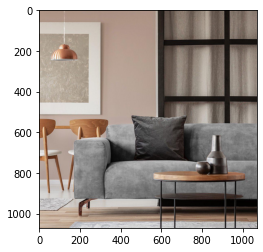

(1, 224, 224, 3)
[[1 0 0 0]]


'\n#mobilya ([1,0,0,0])\n#perde ([0,1,0,0])\n#double ([1,1,0,0])\n#kumas ([0,0,1,0])\n#alakasız([0,0,0,1])\n'

In [ ]:
kumas_img_path='/content/drive/MyDrive/test/mobilya-24.jpg'
img = image.load_img(kumas_img_path)
plt.imshow(img)
plt.show()

img =cv2.imread(kumas_img_path)
img = cv2.resize(img,(224,224))
img = np.array(img)

img = img.reshape(1,224,224,3)
print(img.shape)
'''
print(resnet_model.predict_classes(image))'''
y_pred = resnet_model.predict(img)
y_pred = np.round(y_pred).astype(int)
print(y_pred)
'''
#mobilya ([1,0,0,0])
#perde ([0,1,0,0])
#double ([1,1,0,0])
#kumas ([0,0,1,0])
#alakasız([0,0,0,1])
'''

In [ ]:
y_pred = resnet_model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

for i in range(len(Y_test)):
  print(y_pred[i],Y_test[i])
